# THE SPARKS FOUNDATION - #GRIPSEPTEMBER22 
#### *Author - Shreyash Salunke*

# TASK-1:- Prediction using supervised ML (Simple Linear Regression)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [3]:
df = pd.read_csv("http://bit.ly/w-data")

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Analysis & Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


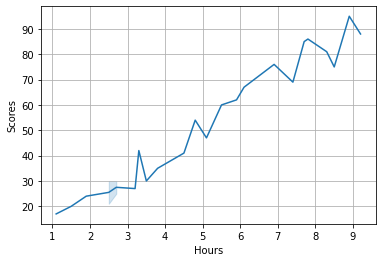

In [8]:
sns.lineplot(x="Hours", y="Scores", data=df)
plt.grid()

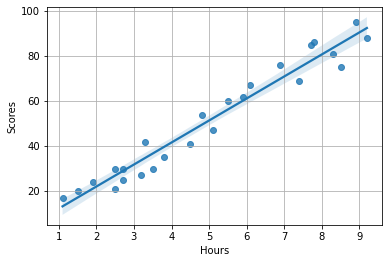

In [9]:
sns.regplot(x="Hours", y="Scores", data=df)
plt.grid()

## Encoding of Independent & Dependent Data

In [10]:
X = df[["Hours"]]
y = df["Scores"]

In [11]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [12]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

## Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [14]:
len(y_test)

7

## Fitting a Straight Line

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

print("Coefficient:\t", lr.coef_)
print("Constant:\t", lr.intercept_)

Coefficient:	 [9.94167834]
Constant:	 1.932204253151646


In [17]:
y_predLR = lr.predict(X_test)

MAE = mean_absolute_error(y_test, y_predLR)
MSE = mean_squared_error(y_test, y_predLR)
RMSE = np.sqrt(MSE)

print(f"MAE: {round(MAE, 2)}")
print(f"MSE: {round(MSE, 2)}")
print(f"RMSE: {round(RMSE, 2)}")

MAE: 4.13
MSE: 20.33
RMSE: 4.51


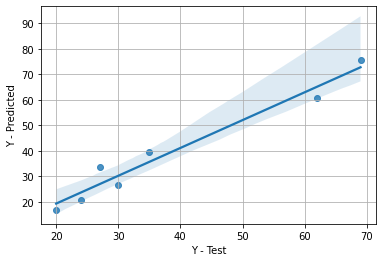

In [18]:
sns.regplot(y_test, y_predLR)
plt.xlabel("Y - Test")
plt.ylabel("Y - Predicted")
plt.grid()
plt.show()

## Error Term Representation

In [19]:
test_res = y_test - y_predLR
test_res.describe()

count    7.000000
mean    -0.999629
std      4.749310
min     -6.745575
25%     -5.605603
50%      1.411894
75%      3.166943
max      3.213600
Name: Scores, dtype: float64

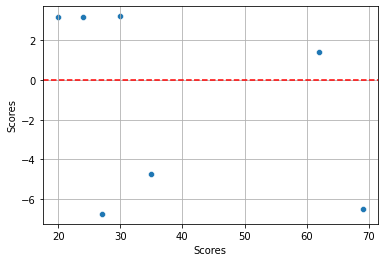

In [20]:
sns.scatterplot(x=y_test, y=test_res)
plt.axhline(color="r", linestyle="--")
plt.grid()

## Manual Examination of the model

In [21]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
hours = [[9.25]]
scores = lr.predict(hours)
print(f"With {hours[0][0]} hours of study per day, a student is expected to achieve a score of {round(scores[0], 2)}.")

With 9.25 hours of study per day, a student is expected to achieve a score of 93.89.


### The End